In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


#import os
#print(os.listdir("./dataset"))

In [26]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [27]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1, inplace=True)

In [28]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [30]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

c:\users\prince_shaks\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of spam or ham messages')

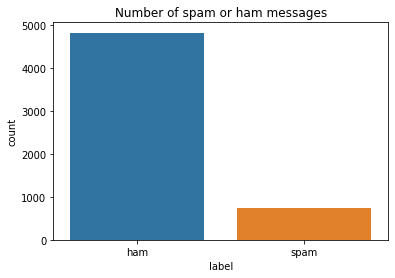

In [34]:
sns.countplot(df.label)
plt.xlabel("label")
plt.title("Number of spam or ham messages")

In [35]:
df["label_as_num"] = df.label.map({"ham":0, "spam":1})

In [36]:
df.head()

,label,text,label_as_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
y = df['label']
x = df['text']
cv = CountVectorizer()
x = cv.fit_transform(x)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [40]:
from sklearn.metrics import classification_report

#Naive Bayes Classifier
clf = MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [41]:
clf.score(X_test,y_test)

0.9784688995215312

In [42]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1453
        spam       0.92      0.92      0.92       219

    accuracy                           0.98      1672
   macro avg       0.95      0.95      0.95      1672
weighted avg       0.98      0.98      0.98      1672



In [43]:
#prediction 1
inp = "you win a plane ticket to dubai. contact urgent"
inp1 = [inp]
inp1 = cv.transform(inp1).toarray()
clf.predict(inp1)

array(['spam'], dtype='<U4')

In [49]:
#prediction 2
inp = "Hello! lets have lunch"
inp2 = [inp]
inp2 = cv.transform(inp2).toarray()
clf.predict(inp2)

array(['ham'], dtype='<U4')

In [51]:
#save the model
#from sklearn.externals import joblib
import joblib
joblib.dump(clf, 'NB_spam_model.pkl')

['NB_spam_model.pkl']